In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
planets = sns.load_dataset('planets')
print("shape:", planets.shape)
planets.head()

shape: (1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [4]:
ser.sum()

2.811925491708157

In [5]:
ser.mean()

0.5623850983416314

In [6]:
# for df
df = pd.DataFrame(rng.rand(5, 2), columns=['A', 'B'])
df

,A,B
0,0.155995,0.058084
1,0.866176,0.601115
2,0.708073,0.020584
3,0.969910,0.832443
4,0.212339,0.181825


In [7]:
df2 = pd.DataFrame(df.mean()).T
df2

,A,B
0,0.582498,0.33881


In [8]:
df.mean(axis='columns')

0    0.107039
1    0.733646
2    0.364329
3    0.901176
4    0.197082
dtype: float64

In [9]:
planets.isna().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [11]:
sum(planets.isnull().any(axis=1) == True)

planets.any()

method            True
number            True
orbital_period    True
mass              True
distance          True
year              True
dtype: bool

In [12]:
planets[planets.isnull().any(axis=1)]

,method,number,orbital_period,mass,distance,year
7,Radial Velocity,1,798.500000,NaN,21.41,1996
20,Radial Velocity,5,0.736540,NaN,12.53,2011
25,Radial Velocity,1,116.688400,NaN,18.11,1996
26,Radial Velocity,1,691.900000,NaN,81.50,2012
29,Imaging,1,NaN,NaN,45.52,2005
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [13]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [14]:
# but if you drop na anywhere
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [15]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [17]:
df.groupby('key')

In [29]:
df.groupby('key').first()

,data
key,
A,0
B,1
C,2


In [30]:
planets.groupby('method')["orbital_period"]

In [32]:
planets.groupby('method')["orbital_period"].median()


method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Astrometry (2, 6)

Eclipse Timing Variations (9, 6)

Imaging (38, 6)

Microlensing (23, 6)

Orbital Brightness Modulation (3, 6)

Pulsar Timing (5, 6)

Pulsation Timing Variations (1, 6)

Radial Velocity (553, 6)

Transit (397, 6)

Transit Timing Variations (4, 6)



<BarContainer object of 10 artists>

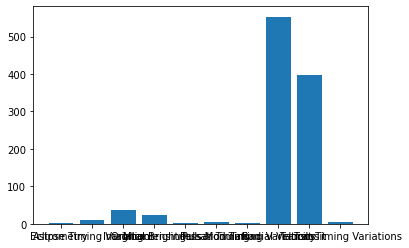

In [55]:
# this is cool
labels = []
data = []
for (method, group) in planets.groupby('method'):
    labels.append(method)
    data.append(len(group))
    print(method, group.shape)
    print()

import matplotlib.pyplot as plt

plt.bar(labels, data)
# side, plotting

<AxesSubplot:xlabel='method'>

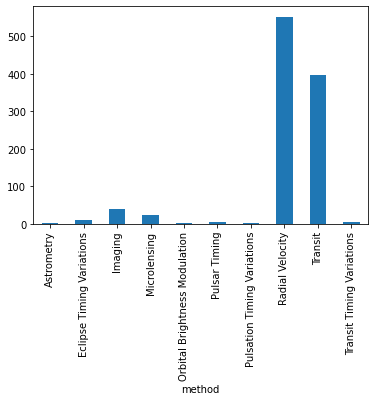

In [69]:
planets.groupby('method')["year"].count().plot(kind='bar')

<AxesSubplot:xlabel='year'>

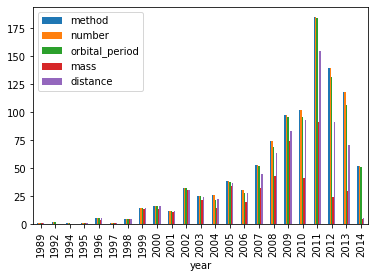

In [76]:
planets.groupby('year').count().plot(kind='bar')

In [77]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'data1': rng.rand(6),
                    'data2': rng.randint(0, 10, 6)},
                    )
df

,key,data1,data2
0,A,0.374540,7
1,B,0.950714,4
2,C,0.731994,3
3,A,0.598658,7
4,B,0.156019,7
5,C,0.155995,2
